## Identify: Problem Statement / Hypothesis

We take a look at the billboard top 100 charts and create an analysis of the data.

What is the likelihood of a song hitting number 1?
Are different genres more likely to hit Number 1 than others?
Have all genres hit Number 1?

My hypothesis is that the more of a genre that makes it to the top 100, the more of that genre hits Number 1.

## Identify Risks & Assumptions

This is a difficult hypothesis to study since the data we have is small (360 entries) and we do not have multiple samples to study.

## Import Data Using Pandas

In [780]:
# first we import 
import pandas as pd
import numpy as np

# next, we load the csv and save to a DataFrame
df = pd.read_csv('assets/billboard.csv')

## Perform EDA Using Pandas

In [781]:
# Replace all * values in the dataset to Nan objects
def replace_nulls(value):
    if value == '*':
        return np.nan
    else:
        return value
df = df.applymap(replace_nulls)

In [782]:
# Change the time column into track length in seconds
def to_seconds(value):
    split = value.split(',')
    return int(split[0])*60 + int(split[1])
df['time'] = df['time'].map(to_seconds)

In [783]:
# Removes columns that are all NaN values
df.dropna(axis=1, how='all', inplace=True)
df

,year,artist.inverted,track,time,genre,date.entered,date.peaked,x1st.week,x2nd.week,x3rd.week,...,x56th.week,x57th.week,x58th.week,x59th.week,x60th.week,x61st.week,x62nd.week,x63rd.week,x64th.week,x65th.week
0,2000,Destiny's Child,Independent Women Part I,218,Rock,"September 23, 2000","November 18, 2000",78,63,49,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,Santana,"Maria, Maria",258,Rock,"February 12, 2000","April 8, 2000",15,8,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,Savage Garden,I Knew I Loved You,247,Rock,"October 23, 1999","January 29, 2000",71,48,43,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,Madonna,Music,225,Rock,"August 12, 2000","September 16, 2000",41,23,18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),218,Rock,"August 5, 2000","October 14, 2000",57,47,45,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2000,Janet,Doesn't Really Matter,257,Rock,"June 17, 2000","August 26, 2000",59,52,43,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2000,Destiny's Child,Say My Name,271,Rock'n'roll,"December 25, 1999","March 18, 2000",83,83,44,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2000,"Iglesias, Enrique",Be With You,216,Latin,"April 1, 2000","June 24, 2000",63,45,34,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2000,Sisqo,Incomplete,232,Rock'n'roll,"June 24, 2000","August 12, 2000",77,66,61,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2000,Lonestar,Amazed,265,Country,"June 5, 1999","March 4, 2000",81,54,44,...,25,26,31,32,37,42,42,45,50,NaN


In [784]:
# Merge 'R & B' with 'R&B'
def remove_space(name):
    if name == 'R & B':
        return name.replace(" ", "")
    else:
        return name
df['genre'] = df['genre'].map(remove_space)

## Plot Data, Generate Visuals, and analyze findings

[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60]


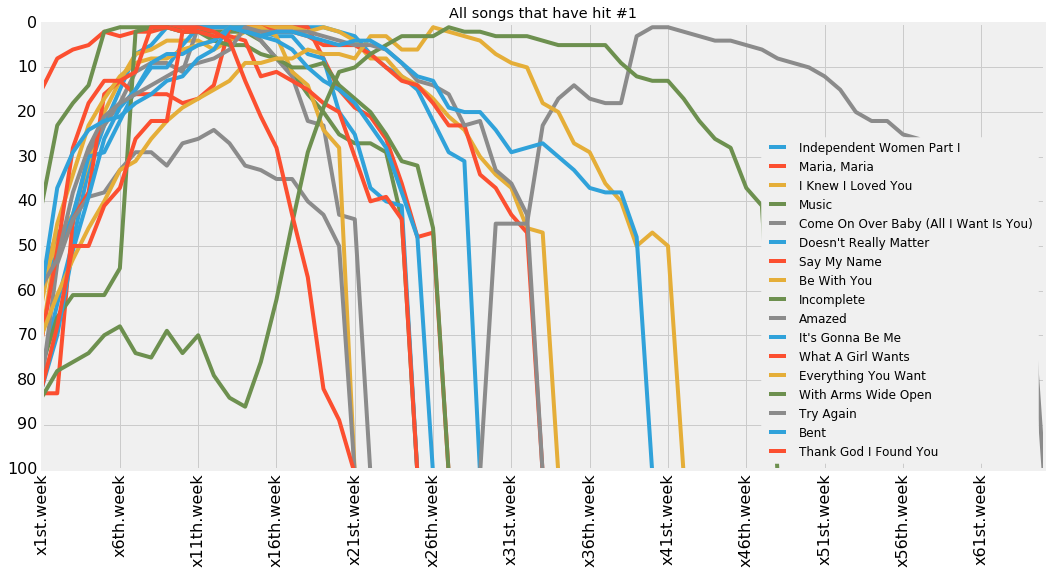

In [828]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline  

ts = df.loc[:, [x for x in df.columns if 'week' in x]]
ts.index = [x for x in df['track']]
ts = ts.T.apply(pd.to_numeric)
ts.fillna(101., inplace=True)

have_hit_1 = pd.DataFrame()
for x in ts:
    if 1. in ts[x].values:
        have_hit_1[x] = ts[x]
have_hit_1

# list comprehension to get only ticks divisible by 5
xticks_to_show = [x for x in range(len(have_hit_1.index)) if x % 5 == 0]
print xticks_to_show
yticks_to_show = [x for x in range(101) if x % 10 == 0]
have_hit_1.plot(figsize=(16,8), xticks=xticks_to_show, yticks=yticks_to_show, fontsize=16, rot=90, ylim=[0,100], title='All songs that have hit #1').invert_yaxis()


This visualization is not very useful. It show's too much information in one graph. Lets see what happens if we Plot each song individually.

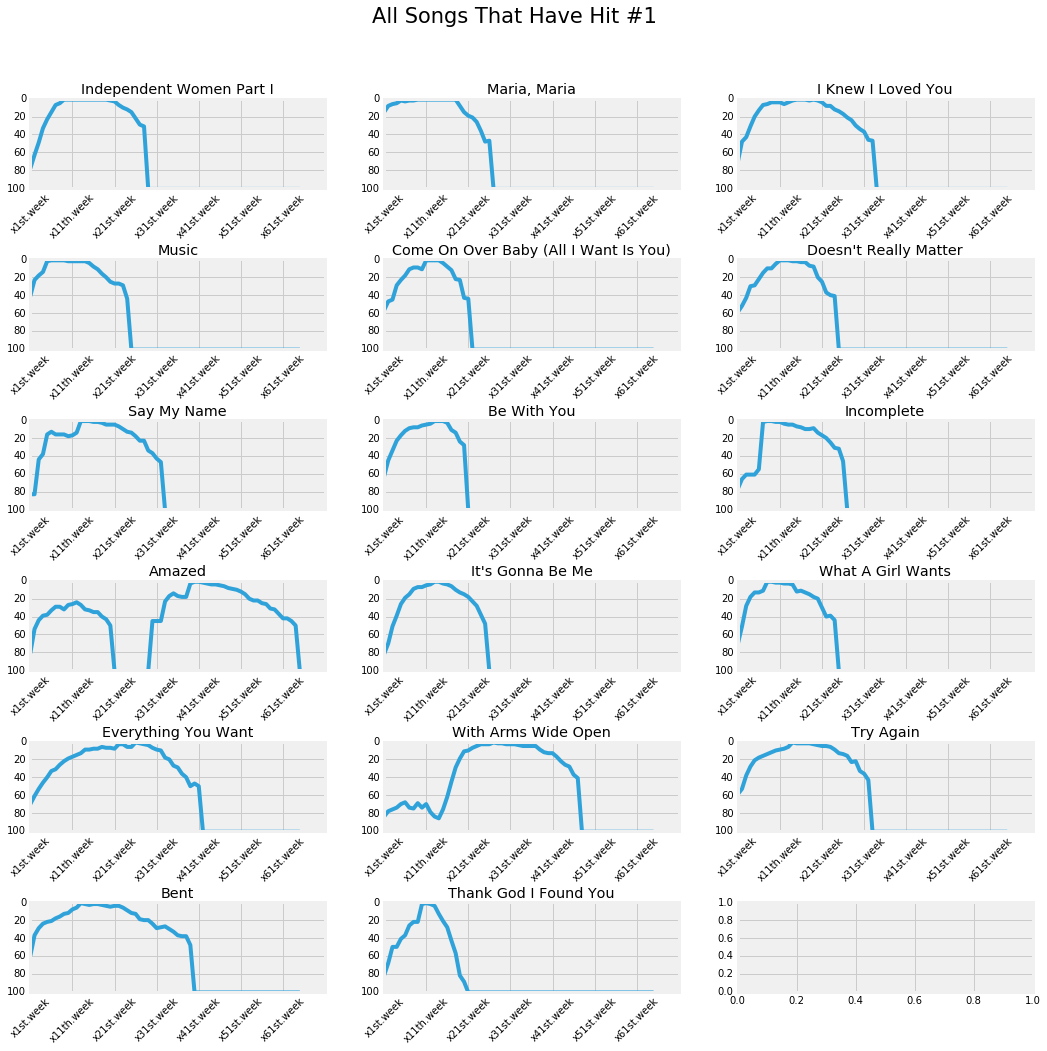

In [792]:
fig, axes = plt.subplots(6,3, figsize=(16,16))
fig.suptitle('All Songs That Have Hit #1', fontsize=21)
fig.subplots_adjust(hspace=.8)
#list comprehension to get only ticks divisible by 3
xticks_to_show = [x for x in range(len(have_hit_1.index)) if x % 10 == 0]
yticks_to_show = [x for x in range(101) if x % 20 == 0]
column_list = have_hit_1.columns.tolist()

for idx, song in enumerate(have_hit_1):
    row = idx/axes.shape[1]
    column = idx%axes.shape[1]
    axes[row][column].plot(have_hit_1[song].values)
    axes[row][column].set_xticklabels(have_hit_1.index[xticks_to_show], rotation=45)
    axes[row][column].set_yticks(yticks_to_show)
    axes[row][column].set_yticklabels(yticks_to_show)
    axes[row][column].set_title(column_list[idx])
    axes[row][column].set_ylim([0,100])
    axes[row][column].invert_yaxis()

While this is interesting to look at. We still cannot extract much information from visualizing all the data. We need to parse and munge the data a little more to take a closer look under the hood.

We can see that the song "With arms wide open" had the longest running streak in the top 100 charts, and "Thank god I found you"

Let's take a look at the averages of each genre.

In [829]:
genres = df.loc[:, [x for x in df.columns if x in ['week', 'genre']]]
genres.index = [x for x in df['track']]
genres = genres.T

non_101 = df.loc[:, [x for x in df.columns if 'week' in x]]
non_101.index = [x for x in df['track']]
non_101 = non_101.T.apply(pd.to_numeric)
# non_101.fillna(0., inplace=True)


have_hit_1_weeks = pd.DataFrame()
have_hit_1_genres = pd.DataFrame()
have_not_hit_1_weeks = pd.DataFrame()
have_not_hit_1_genres = pd.DataFrame()


w_i_w_b = 0
for x in non_101:
    if 1. in non_101[x].values:
        have_hit_1_weeks[x] = non_101[x]
        have_hit_1_genres[x] = genres[x]
    else:
        # There are two songs with the same name, we need to check for that
        if x == 'Where I Wanna Be':
            have_not_hit_1_weeks[x] = non_101[x].iloc[:,w_i_w_b]
            have_not_hit_1_genres[x] = genres[x].iloc[:,w_i_w_b]
            w_i_w_b +=1
        else:
            have_not_hit_1_weeks[x] = non_101[x]
            have_not_hit_1_genres[x] = genres[x]
        
have_hit_1_weeks = have_hit_1_weeks.T
have_hit_1_genres = have_hit_1_genres.T
have_not_hit_1_weeks = have_not_hit_1_weeks.T
have_not_hit_1_genres = have_not_hit_1_genres.T

df2 = pd.concat([have_hit_1_genres, have_hit_1_weeks], axis=1)
have_not_hit_1 = pd.concat([have_not_hit_1_genres, have_not_hit_1_weeks], axis=1)
have_not_hit_1

,genre,x1st.week,x2nd.week,x3rd.week,x4th.week,x5th.week,x6th.week,x7th.week,x8th.week,x9th.week,...,x56th.week,x57th.week,x58th.week,x59th.week,x60th.week,x61st.week,x62nd.week,x63rd.week,x64th.week,x65th.week
Breathe,Rap,81.0,68.0,62.0,51.0,42.0,35.0,28.0,28.0,28.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Case Of The Ex (Whatcha Gonna Do),Rock'n'roll,72.0,57.0,52.0,47.0,42.0,31.0,24.0,18.0,17.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
He Loves U Not,Rock,99.0,92.0,81.0,59.0,47.0,42.0,32.0,27.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
He Wasn't Man Enough,Rock,63.0,55.0,48.0,39.0,35.0,24.0,3.0,2.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
You Sang To Me,Latin,77.0,54.0,50.0,43.0,30.0,27.0,21.0,18.0,15.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Give Me Just One Night (Una Noche),Rock,51.0,39.0,34.0,26.0,26.0,19.0,2.0,2.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Jumpin' Jumpin',Rock,74.0,71.0,65.0,62.0,57.0,50.0,40.0,37.0,22.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Kryptonite,Rock,81.0,70.0,68.0,67.0,66.0,57.0,54.0,53.0,51.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Thong Song,Rock'n'roll,74.0,63.0,35.0,26.0,26.0,23.0,20.0,16.0,13.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
I Turn To You,Rock'n'roll,50.0,39.0,30.0,28.0,21.0,19.0,20.0,17.0,17.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [823]:
print "Count of all the genres in the full dataset:"
print df['genre'].value_counts()
print "Count of all the genres in the dataset with only Number 1 songs:"
print df2['genre'].value_counts()

Count of all the genres in the full dataset:
Rock           103
Country         74
Rap             58
Rock'n'roll     34
R&B             23
Pop              9
Latin            9
Electronica      4
Gospel           1
Jazz             1
Reggae           1
Name: genre, dtype: int64
Count of all the genres in the dataset with only Number 1 songs:
Rock           8
Rock'n'roll    7
Latin          1
Country        1
Name: genre, dtype: int64


Does the number one sample represent the population sample?
Why is there so much rock and rock n roll compared to latin and country?

In [753]:
print "Percent of each genre that has made it to Number 1"
percent_of_one_by_genre = (df2['genre'].value_counts() * 100 / df['genre'].value_counts()).fillna(0.)
print percent_of_one_by_genre

Percent of each genre that has made it to Number 1
Country         1.351351
Electronica     0.000000
Gospel          0.000000
Jazz            0.000000
Latin          11.111111
Pop             0.000000
R&B             0.000000
Rap             0.000000
Reggae          0.000000
Rock            7.766990
Rock'n'roll    20.588235
Name: genre, dtype: float64


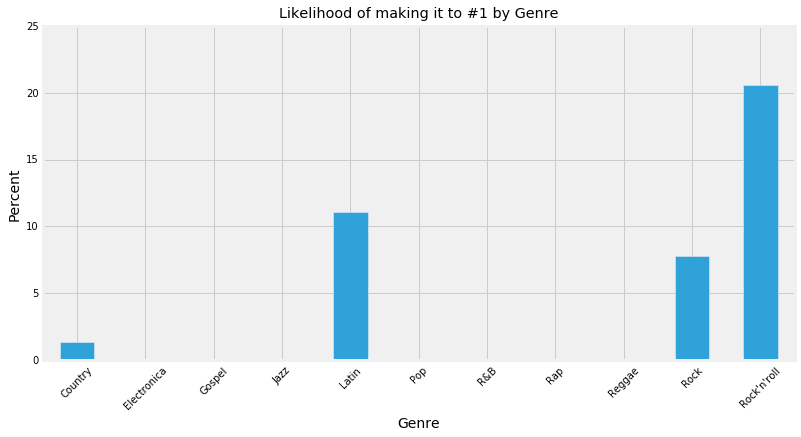

In [811]:
percent_of_one_by_genre.plot(kind='bar', figsize = (12,6), rot=45)
# get the current axis
ax = plt.gca()

ax.set_ylabel('Percent', fontsize=14)
ax.set_xlabel('Genre', fontsize=14)
ax.set_title('Likelihood of making it to #1 by Genre', y=1.01)

We see here that Rock and roll tracks that make it to the top 100 have the highest chance of getting to the number 1 spot. ~21% of all rock and roll tracks that reach the top 100 make it to number 1.

This is interesting because rock and roll does not have the highest number of songs in the top 100. Rock does, which is in second place at ~8%.

Let's visualize this another way.

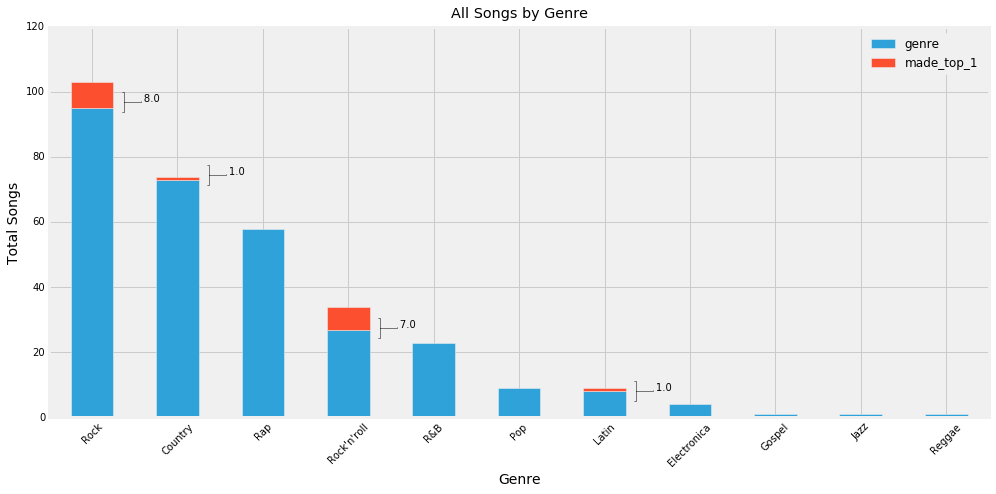

In [810]:
df3 = df['genre'].value_counts().to_frame()
df3['made_top_1'] = df2['genre'].value_counts()
df3.fillna(0., inplace=True)
df3['genre'] = df3['genre']-df3['made_top_1']
ax = df3[['genre', 'made_top_1']].plot(kind='bar', stacked=True, figsize=(15,7), rot=45)

for p in ax.patches:
    if p.get_y() > 0:
        ax.annotate("       " + str(p.get_height()), (p.get_x()+0.6, p.get_y()*1.02), arrowprops=dict(arrowstyle='-[',
                  connectionstyle="bar,fraction=0,angle=90", color='k'))
ax.set_ylabel('Total Songs', fontsize=14)
ax.set_xlabel('Genre', fontsize=14)
ax.set_title('All Songs by Genre', y=1.01)

We can see now the weight of rock and roll tracks that make the number 1 spot. As a percentage of the total number of rock and roll tracks, it is much higher than any other genre.

In [831]:
# Get the column names except for genre (includes all week columns)
columns = df2.drop('genre', axis=1).columns
# Get the averages of each genres performance by week
average_genres = df2.groupby('genre')[columns].mean()
# Remove Latin and Country since they only have one song that has hit number 1
average_genres.drop(['Latin', 'Country'], inplace=True)
# Transpose it to be able to plot against time
average_genres = average_genres.T
# Fill the NaN's with 101 so we get a pretty drop down in the line plot
average_genres.fillna(101., inplace=True)

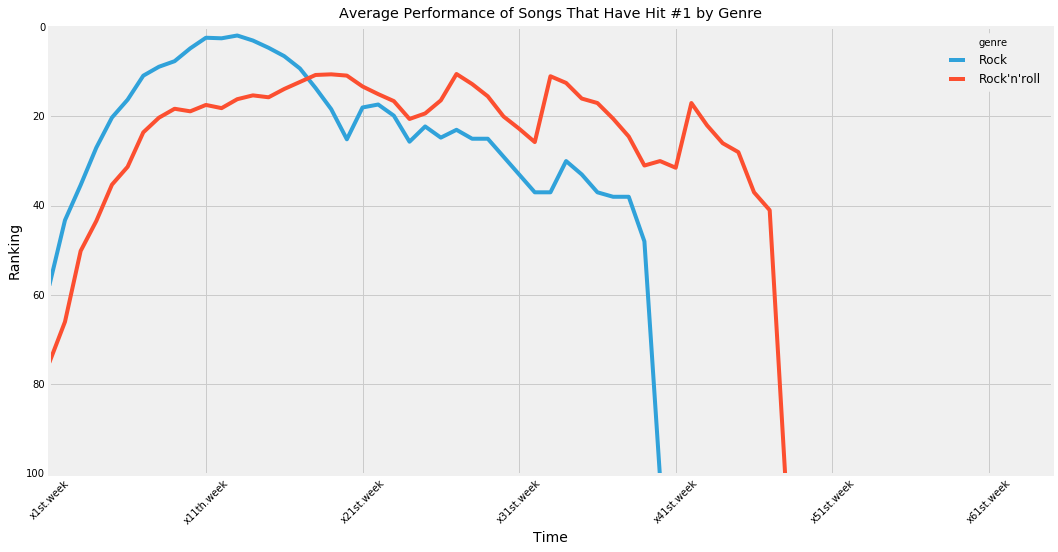

In [825]:
# Plot the averages of genres performance
# Y limit is set to 1-100 so we cannot see the 101 values that were NaN replaced earlier
# Invert the y axis so climbing up to Number 1 makes more visual sense
qx = average_genres.plot(figsize=(16,8), ylim=[0,100], rot=45)
qx.set_ylabel('Ranking', fontsize=14)
qx.set_xlabel('Time', fontsize=14)
qx.set_title('Average Performance of Songs That Have Hit #1 by Genre', y=1.01)
qx.invert_yaxis()

First, we choose to remove latin and country from this graph because both genres only have 1 song that hit number 1 at some point.

The bar chart of average performance of tracks that have hit number one by genre shows us a few things.

1) Rock tracks peak faster than rock n roll tracks.
2) Rock n roll tracks stay on the charts for longer
3) Rock tracks are more popular (meaning they average closer to number one than rock n roll)

In [837]:
# Get the column names except for genre (includes all week columns)
columns = have_not_hit_1.drop('genre', axis=1).columns
# Get the averages of each genres performance by week
average_genres_not_1 = have_not_hit_1.groupby('genre')[columns].mean()
# Remove Latin and Country since they only have one song that has hit number 1
average_genres_not_1.drop(['Latin', 'Country'], inplace=True)
# Transpose it to be able to plot against time
average_genres_not_1 = average_genres_not_1.T
# Fill the NaN's with 101 so we get a pretty drop down in the line plot
average_genres_not_1.fillna(101., inplace=True)

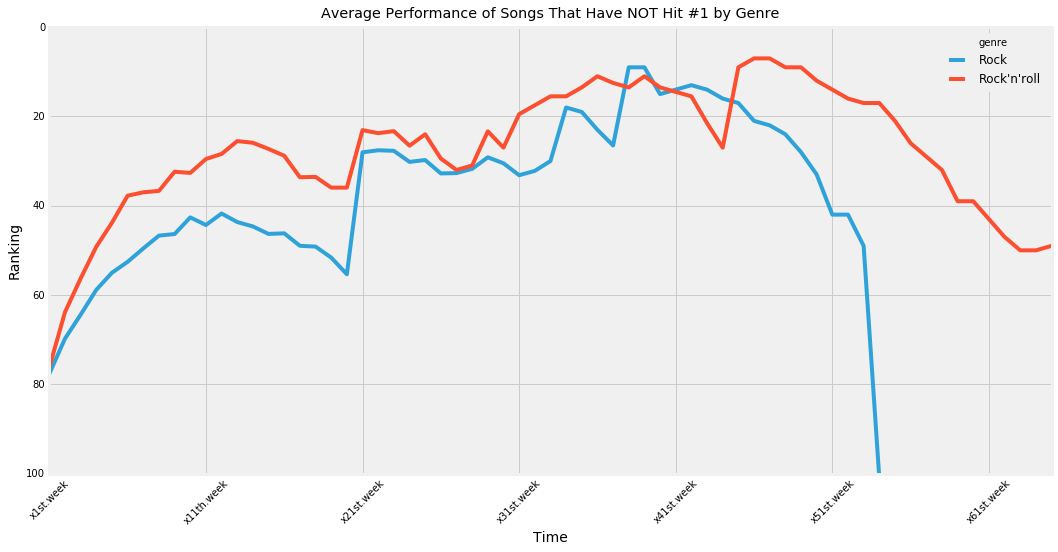

In [838]:
# Plot the averages of genres performance
# Y limit is set to 1-100 so we cannot see the 101 values that were NaN replaced earlier
# Invert the y axis so climbing up to Number 1 makes more visual sense
qx = average_genres_not_1[["Rock", "Rock'n'roll"]].plot(figsize=(16,8), ylim=[0,100], rot=45)
qx.set_ylabel('Ranking', fontsize=14)
qx.set_xlabel('Time', fontsize=14)
qx.set_title('Average Performance of Songs That Have NOT Hit #1 by Genre', y=1.01)
qx.invert_yaxis()

Compared to the songs that have made it to Number 1. This chart shows that rock n roll is generally a more popular genre. It does not trail off at the end and it generally remains popular for much longer. It also avergaes higher throughout the lifecycle of the average song.